In [51]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

**File path**

In [2]:
file_path = r"E:\mlproject\data\stud.csv"

**read CSV file**

In [3]:
df = pd.read_csv(file_path)

In [4]:
print(df.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


**checking null values**

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**Checking any duplicate values**

In [7]:
df.duplicated().sum()

0

**Cheking data type**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Checking the unique values of each columns**

In [28]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**Checking statistic of data set**

In [29]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**unique values of Categorical data**

In [32]:
print("Unique value of 'Gender' variable : ")
print(df['gender'].unique())
print("Unique value of 'race ethnicity' variable : ")
print(df['race_ethnicity'].unique())
print("Unique value of 'parental level of education' variable : ")
print(df['parental_level_of_education'].unique())
print("Unique value of 'lunch' variable : ")
print(df['lunch'].unique())
print("Unique value of 'test preparation course' variable : ")
print(df['test_preparation_course'].unique())

Unique value of 'Gender' variable : 
['female' 'male']
Unique value of 'race ethnicity' variable : 
['group B' 'group C' 'group A' 'group D' 'group E']
Unique value of 'parental level of education' variable : 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique value of 'lunch' variable : 
['standard' 'free/reduced']
Unique value of 'test preparation course' variable : 
['none' 'completed']


**Adding columns of total_score and average in the dataframe**

In [110]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = round(df['total_score']/3, 2)

In [36]:
print(df.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  average  
0          218    72.67  
1          247    82.33  
2          278    92.67  
3          148    49.33  
4          229    76.3

**Number of Students get 100 marks in at least one subject**

In [44]:
reading_full_score = df[df['reading_score'] == 100]['total_score'].count()
math_full_score = df[df['math_score']==100]['total_score'].count()
writing_full_score = df[df['writing_score']==100]['total_score'].count()

In [49]:
print("Number of students got 100 marks in Reading :",reading_full_score)
print("Number of students got 100 marks in Maths :",math_full_score)
print("Number of students got 100 marks in Writing :",writing_full_score)

Number of students got 100 marks in Reading : 17
Number of students got 100 marks in Maths : 7
Number of students got 100 marks in Writing : 14


**average marks comparision based on Gender**

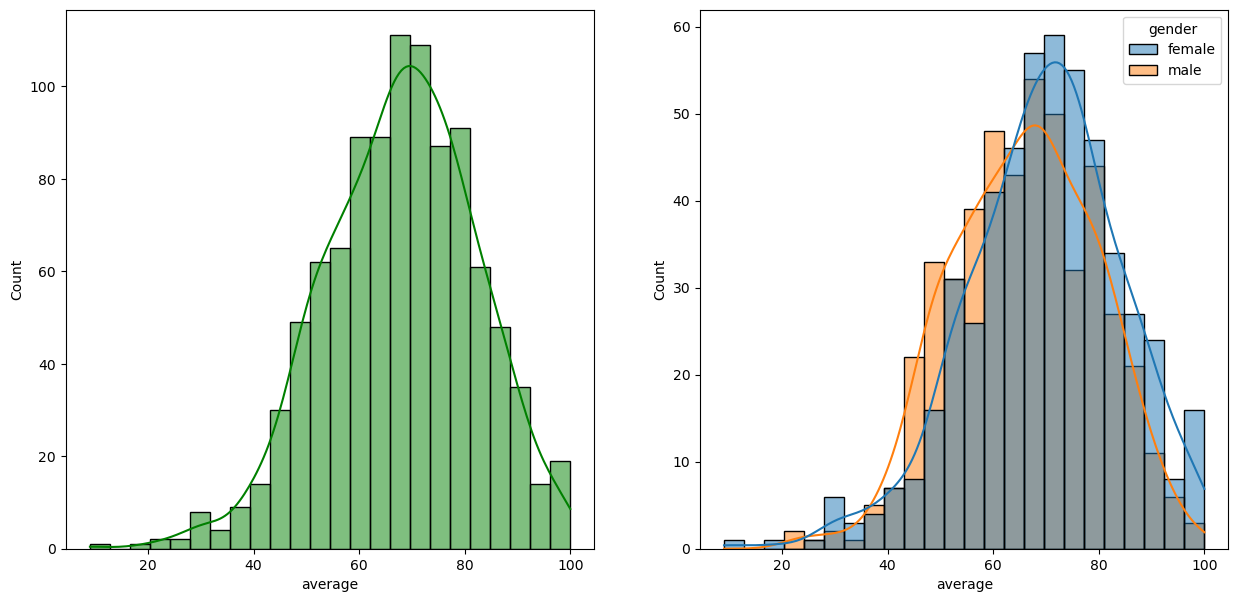

In [61]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

**total score comparision based on Gender**

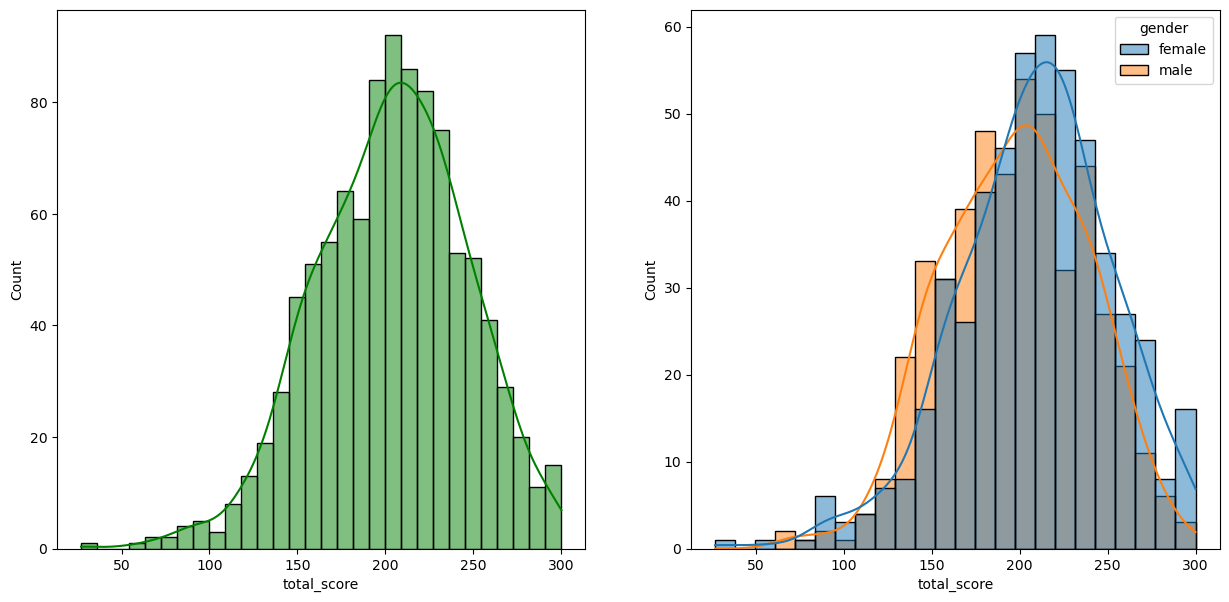

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

**Checking the number of records based on gender**

In [108]:
number_of_records_by_gender = df.groupby('gender').count()
print(number_of_records_by_gender['average'])

gender
female    518
male      482
Name: average, dtype: int64


In [91]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


**(BIVARIATE ANALYSIS )Is gender has any impact on student's performance ?**

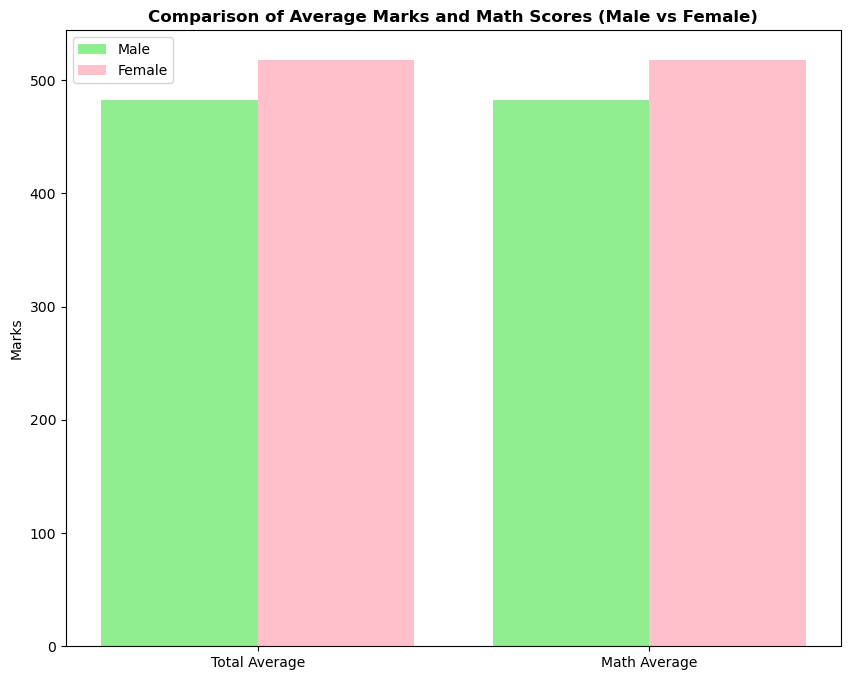

In [126]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis -0.2, male_scores, 0.4, label = 'Male', color='lightgreen')
plt.bar(X_axis +0.2, female_scores, 0.4, label = 'Female', color='pink')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Comparison of Average Marks and Math Scores (Male vs Female)", fontweight='bold')
plt.legend()
plt.show()

**Is education level of parent's affect student performance?**

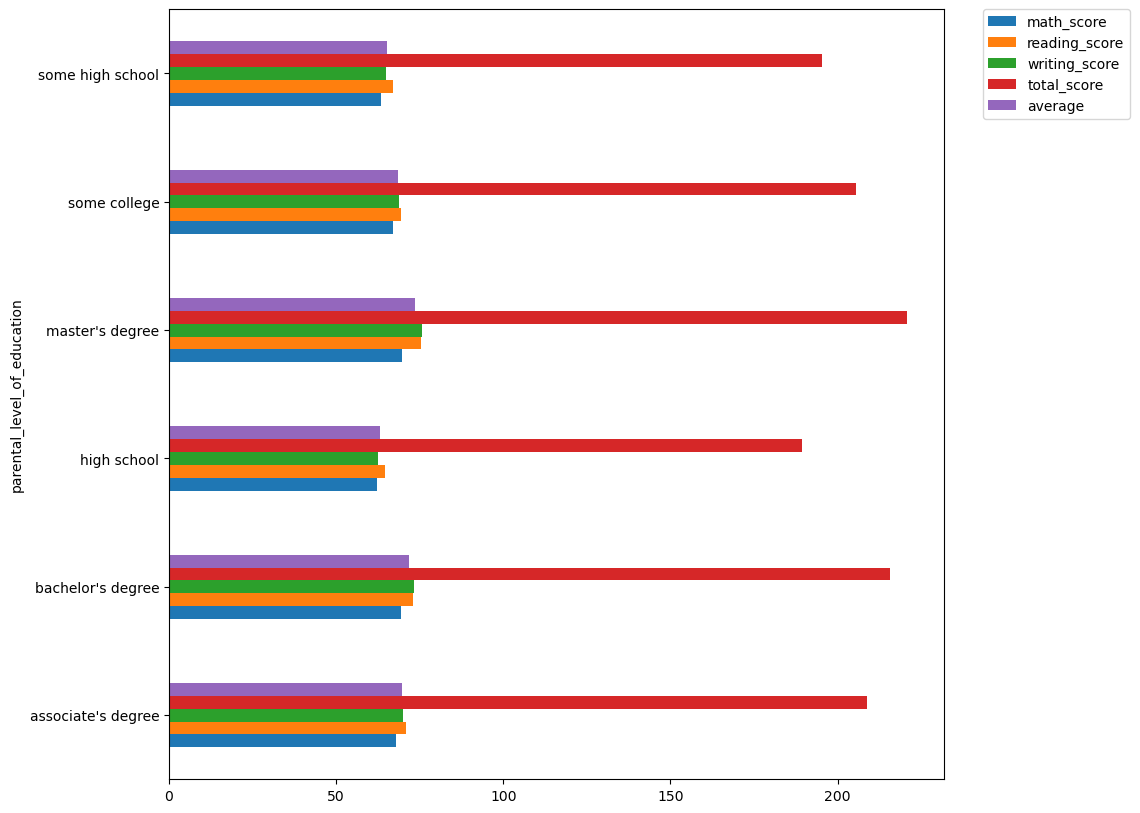

In [96]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
